# Introduction à pandas
### Ou comment devenir un ninja des données
-----

![Logo de pandas](http://pandas.pydata.org/_static/pandas_logo.png)
Tutoriel sur [pandas](http://pandas.pydata.org/) ([documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)), bibliothèque python permettant d'analyser et d'interroger rapidement des données; particulièrement utile lorsqu'on a des fichiers volumineux qu'un tableur comme *Excel*, *Calc* ou *Google Sheets* a de la difficulté à avaler. Contenu préparé pour le [EDM5240](https://www.gitbook.com/book/jhroy/edm5240-h2017/details), cours de journalisme informatique de l'[Université du Québec à Montréal](http://uqam.ca/) (mars 2017).<br>
*Rappel: [comment utiliser pandas avec Cloud9](https://gist.github.com/jhroy/628b9dfca4896571352e4f735c024583)*
<hr>

Le premier bloc de code, ci-dessous, ressemble au début des scripts que vous avez réalisés jusqu'à maintenant. Il s'agit d'importer les modules dont nous aurons besoin. On leur donne même un surnom. C'est ainsi que **```pandas```** devient **```pd```**, par exemple.
<br>
La ligne **```%matplotlib inline```** sert simplement à demander à notre carnet d'afficher des graphiques dans la page lorsqu'on souhaitera en créer.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mp

On peut changer les options d'affichage de pandas avec la fonction ```.set_option```.<br>
Ici, on demande que l'affichage des nombres ne soit **pas** en notation scientifique, comme il l'est par défaut.

In [2]:
pd.set_option("display.float_format", lambda x : "%.2f" % x)

Ci-dessous, on lit [deux des fichiers que je vous ai donnés](http://bit.ly/jhroypandas).<br>
On les mets chacun dans une variable. J'ai choisi de baptiser l'une de ces variables ```md``` puisque le fichier indiqué comprend des données sur l'ensemble des membres du Collège des médecins, et l'autre ```mil``` puisque le fichier indiqué contient, pour sa part, des données sur les contrats octroyés par le ministère de la Défense nationale.<br>
Pour pandas, cette structure de données, qui consiste en un tableau à deux dimensions, est appelé un _**dataframe**_.<br>

In [3]:
md = pd.read_csv("cmq.csv")
mil = pd.read_csv("militaires.csv")

Pour connaître le type des variables que contient notre tableau, on peut utiliser la fonction ```.dtypes```.<p>
Dans pandas, les principaux types de variables sont&nbsp;:

* ```int``` -> nombres entiers
* ```float``` -> nombres décimaux
* ```object``` -> chaînes de caractères
* ```datetime``` -> dates
* ```bool``` -> vrai ou faux

Ces types sont parfois suivis d'un nombre qui indique la taille, en caractères, maximale des variables de ce type.

In [4]:
md.dtypes

num                object
annee               int64
prenom             object
nom                object
genre              object
specialite1        object
specialite2        object
specialite3        object
statut             object
dateChangStatut    object
typePermis         object
ville              object
prov               object
pays               object
dtype: object

In [5]:
mil.dtypes

annee            int64
trimestre        int64
date            object
fournisseur     object
description     object
montant        float64
dtype: object

## Exploration simple de nos données
-----

Pour afficher simplement le contenu de notre variable, il n'est pas nécessaire d'écrire ```print(md)```.<br>Écrire le nom de la variable suffit.<br>
Cela produit un immense tableau avec les 30 premières et les 30 dernières lignes de notre fichier.

In [6]:
md

,num,annee,prenom,nom,genre,specialite1,specialite2,specialite3,statut,dateChangStatut,typePermis,ville,prov,pays
0,#30001,1930,Lucien,Amyot,M,Médecine de famille,NaN,NaN,Retrait pour décès,1981-12-29,Régulier,Montréal,Québec,Canada
1,#30002,1930,Wilfrid,Audet,M,Inconnue,NaN,NaN,Démission,1987-10-01,Régulier,Alma,Québec,Canada
2,#30003,1930,A. T.,Batshaw,M,Médecine de famille,NaN,NaN,Retrait pour décès,1983-11-11,Régulier,Montréal,Québec,Canada
3,#30005,1930,Maurice,Beaudry,M,Dermatologie,NaN,NaN,Retrait pour décès,1989-02-12,Régulier,Québec,Québec,Canada
4,#30006,1930,P. E.,Belleau,M,Médecine interne,NaN,NaN,Retrait pour décès,1986-05-31,Régulier,Québec,Québec,Canada
5,#30008,1930,Antoni,Blais,M,Médecine de famille,NaN,NaN,Retrait pour décès,1983-06-30,Régulier,Sherbrooke,Québec,Canada
6,#30012,1930,Lyla,Brown,F,Médecine de famille,NaN,NaN,Retrait pour décès,1994-06-07,Régulier,Montréal,Québec,Canada
7,#30014,1930,Alphonse,Couturier,M,Chirurgie générale,NaN,NaN,Retrait pour décès,1995-08-11,Régulier,Cap-Rouge,Québec,Canada
8,#30015,1930,Guy,D'Argencourt,M,Chirurgie générale,NaN,NaN,Radié pour non-paiement de cotisation,1988-11-30,Régulier,Outremont,Québec,Canada
9,#30017,1930,Rémi,Desjardins,M,Médecine de famille,NaN,NaN,Retrait pour décès,1989-09-23,Régulier,Sainte-Thérèse,Québec,Canada


Pour avoir un aperçu des dimensions de de votre tableau, utilisez plutôt la fonction ```.shape```.

In [7]:
md.shape

(35109, 14)

Pour consulter les premières ou les dernières lignes de votre tableau, vous pouvez vous servir de fonctions qui ressemblent à ce qu'on a vu dans [Unix](http://bit.ly/jhroyunix), au début de la session, ```.head()``` et ```.tail()```.

In [8]:
md.head()

,num,annee,prenom,nom,genre,specialite1,specialite2,specialite3,statut,dateChangStatut,typePermis,ville,prov,pays
0,#30001,1930,Lucien,Amyot,M,Médecine de famille,NaN,NaN,Retrait pour décès,1981-12-29,Régulier,Montréal,Québec,Canada
1,#30002,1930,Wilfrid,Audet,M,Inconnue,NaN,NaN,Démission,1987-10-01,Régulier,Alma,Québec,Canada
2,#30003,1930,A. T.,Batshaw,M,Médecine de famille,NaN,NaN,Retrait pour décès,1983-11-11,Régulier,Montréal,Québec,Canada
3,#30005,1930,Maurice,Beaudry,M,Dermatologie,NaN,NaN,Retrait pour décès,1989-02-12,Régulier,Québec,Québec,Canada
4,#30006,1930,P. E.,Belleau,M,Médecine interne,NaN,NaN,Retrait pour décès,1986-05-31,Régulier,Québec,Québec,Canada


In [9]:
mil.tail()

,annee,trimestre,date,fournisseur,description,montant
165947,2016,3,30-12-2016,NB Harrison Inc,Opérations de parachutage,30700.00
165948,2016,3,30-12-2016,Clint Clawson,Opérations de parachutage,41250.00
165949,2016,3,30-12-2016,The Goodyear Tire & Rubber Company,Pneumatiques et chambres à air d'aéronefs,282000.00
165950,2016,3,30-12-2016,Imperial Oil Limited,Combustible d'aviation,315315.20
165951,2016,3,30-12-2016,S.M.I. Support Measures Inc.,"Antennes, guides d'ondes et équipement connexe...",630000.00


Pour consulter un intervalle précis de lignes, vous pouvez vous servir des crochets. Vous reconnaissez cette syntaxe puisque pandas, c'est du python!<br>
C'est ainsi que, ci-dessous, je demande à afficher les lignes 1000 à 1009 de mon fichier (comme en python, la limite supérieure est exclue de mon intervalle).

In [10]:
md[1000:1010]

,num,annee,prenom,nom,genre,specialite1,specialite2,specialite3,statut,dateChangStatut,typePermis,ville,prov,pays
1000,#44048,1944,Paul H.,Niloff,M,Chirurgie générale,NaN,NaN,Retrait pour décès,1992-02-12,Régulier,Montréal,Québec,Canada
1001,#44049,1944,Walter C.,Lloyd-Smith,M,Chirurgie générale,NaN,NaN,Démission,1999-07-01,Régulier,Sillery,Québec,Canada
1002,#44050,1944,Jean-Benoit,Bechard,M,Chirurgie générale,NaN,NaN,Retrait pour décès,2008-05-02,Régulier,Saint-Lambert,Québec,Canada
1003,#44051,1944,H. F.,Brickman,F,Pédiatrie,NaN,NaN,Radié pour non-paiement de cotisation,1964-08-31,Régulier,NaN,NaN,Inconnu
1004,#44052,1944,E. R.,Mackenzie-Harpur,F,Biochimie médicale,NaN,NaN,Retrait pour décès,2001-02-18,Régulier,Montréal,Québec,Canada
1005,#44054,1944,Claude,Dubé,M,Ophtalmologie,Oto-rhino-laryngologie / chirurgie cervico-fac...,NaN,Retrait pour décès,1982-09-22,Régulier,Montréal,Québec,Canada
1006,#44055,1944,Alban,Damphousse,M,Chirurgie générale,NaN,NaN,Retrait pour décès,1981-11-03,Régulier,Montréal,Québec,Canada
1007,#44056,1944,James L.,Mc Callum,M,Médecine interne,NaN,NaN,Retrait pour décès,1999-04-12,Régulier,Bellefeuille,Québec,Canada
1008,#44057,1944,Samuel A.,Macdonald,M,Urologie,NaN,NaN,Retrait pour décès,1995-04-02,Régulier,Saint-Laurent,Québec,Canada
1009,#44061,1944,Léon,Leclerc,M,Inconnue,NaN,NaN,Démission,1987-09-30,Régulier,Sillery,Québec,Canada


Pour faire afficher un nombre limité de colonnes, on peut ajouter une liste du nom des colonnes qu'on souhaite.<br>
Il faut cependant le faire avec la fonction ```.loc```.

In [11]:
md.loc[7000:7010,["nom","prenom","num"]]

,nom,prenom,num
7000,Behroozi,Cyrus,#67360
7001,Diez,Garcia Pablo,#67361
7002,Coles,Duval,#67362
7003,Pritchard,Élizabeth,#67363
7004,Braithwaite,Desmond,#67364
7005,Freeman,Lincoln C.,#67365
7006,Murat,Paul,#67366
7007,Khoury-Haddad,Albert,#67367
7008,Clecner,Bya,#67368
7009,Papapetropoulos,D.,#67369


On peut aussi utiliser, au lieu du nom des colonnes, le numéro d'index des colonnes qu'on souhaite afficher.<br>
Il faut alors utiliser la fonction ```.iloc```

In [12]:
mil.iloc[100000:100011,3:]

,fournisseur,description,montant
100000,MLS USA Corporation,Articles divers (Comprend seulement ces articl...,158732.13
100001,Turtle Island Staffing,"Services d'aide temporaire, soutien administra...",46782.00
100002,IMPERIAL OIL,MAZOUT,14329.30
100003,IMPERIAL OIL,MAZOUT,14663.55
100004,Valley Refrigeration Limited,Travaux professionnels spéciaux de construction,73989.47
100005,Centaur Products inc.,Travaux de construction pour édifices,74294.00
100006,Tayco Paving Company,Travaux de construction - génie civil,195725.00
100007,MCM Architects Inc.,Services d'architecture et d'ingénierie - Cons...,71851.00
100008,Shamrock Building Services Ltd,Travaux de construction pour édifices,168400.00
100009,SNC-Lavalin Environment Inc. (Victoria),Services environnementaux,71765.00


Si on souhaite compter combien il y a d'éléments dans chacune de nos colonnes, on peut utiliser la fonction ```.count()```.<br>
Employons-la avec nos deux fichiers.

On constate qu'avec les médecins, il nous manque parfois de l'information. Cela peut faire du sens, comme pour les colonnes ```specialite2``` et ```specialite3```, puisque ce ne sont pas tous les médecins qui ont deux ou trois spécialités. Mais cela peut aussi vouloir dire qu'il y a des données manquantes. Ainsi, on n'a pas la ville dans laquelle excercent tous les médecins.

In [13]:
md.count()

num                35109
annee              35109
prenom             35108
nom                35109
genre              35109
specialite1        35109
specialite2         3467
specialite3          224
statut             35109
dateChangStatut    11412
typePermis         35109
ville              33715
prov               34133
pays               35109
dtype: int64

In [14]:
mil.count()

annee          165952
trimestre      165952
date           165952
fournisseur    165952
description    165945
montant        165952
dtype: int64

Il est souvent utile de connaître le nom des colonnes de notre fichier.<br>
Pour ce faire, entrez la fonction ```.columns```.

In [15]:
md.columns

Index(['num', 'annee', 'prenom', 'nom', 'genre', 'specialite1', 'specialite2',
       'specialite3', 'statut', 'dateChangStatut', 'typePermis', 'ville',
       'prov', 'pays'],
      dtype='object')

Vous remarquez que le nom de chaque colonne se trouve dans une liste. On peut se servir de cette liste pour renommer nos colonnes dans le cas où elles ont des noms barbares. Il suffit de dire que ```md.columns``` est égal à une liste dans laquelle on mettra nos nouveaux noms de colonnes.<br>
C'est ainsi que la commande ci-dessous, par exemple, me permet de rebaptiser la colonne ```dateChangStatut``` par ```date```.

In [16]:
md.columns = ['num', 'annee', 'prenom', 'nom', 'genre', 'specialite1', 'specialite2',
       'specialite3', 'statut', 'date', 'typePermis', 'ville',
       'prov', 'pays']

En invoquant la fonction ```.columns```, je constate que le nom de la colonne a changé.

In [17]:
md.columns

Index(['num', 'annee', 'prenom', 'nom', 'genre', 'specialite1', 'specialite2',
       'specialite3', 'statut', 'date', 'typePermis', 'ville', 'prov', 'pays'],
      dtype='object')

Il est utile de simplifier les noms des colonnes puisqu'on peut faire afficher le contenu d'une colonne de notre choix simplement en ajoutant son nom à notre nom de variable.<br>
On obtient alors non plus un _**dataframe**_, mais une structure de données unidimentionnelle que pandas appelle une _**serie**_.

Voici un exemple avec le genre des médecins&nbsp;:

In [18]:
md.genre

0        M
1        M
2        M
3        M
4        M
5        M
6        F
7        M
8        M
9        M
10       M
11       M
12       M
13       M
14       M
15       M
16       M
17       M
18       M
19       M
20       F
21       M
22       M
23       M
24       M
25       M
26       M
27       M
28       M
29       M
        ..
35079    F
35080    F
35081    F
35082    M
35083    F
35084    M
35085    M
35086    F
35087    M
35088    F
35089    F
35090    M
35091    F
35092    F
35093    M
35094    M
35095    F
35096    F
35097    F
35098    M
35099    M
35100    M
35101    M
35102    F
35103    M
35104    M
35105    M
35106    F
35107    F
35108    M
Name: genre, dtype: object

## Opérations de base
-----

Cette sélection de colonnes est utile pour effectuer une série d'opérations de base qu'on va maintenant aborder.<br>
Si on a une colonne qui contient des nombres, on peut en afficher la valeur maximale ou minimale à l'aide des fonctions ```.max()``` et ```.min()```.<br>
Voici un exemple avec la colonne ```montant``` de notre fichier de données sur les contrats militaires.

In [19]:
mil.montant.max()

9975000.0

In [20]:
mil.montant.min()

0.0

On peut aussi effectuer des calculs simples sur ces colonnes.<br>
Ici, on effectue :
* une somme avec la fonction ```.sum()```
* une moyenne avec la fonction ```.mean()```

Et on trouve la médiane avec la fonction ```.median()```

In [21]:
mil.montant.sum()

27163294776.259998

In [22]:
mil.montant.mean()

163681.63551062957

In [23]:
mil.montant.median()

28984.5

Dans les cas où vous avez plusieurs colonnes composées de nombres, il peut être intéressant de réunir toutes ces informations à l'intérieur d'un seul et même tableau.<br>
C'est ce que nous permet de faire la fonction ```.describe()```.

In [24]:
mil.describe()

,annee,trimestre,montant
count,165952.00,165952.00,165952.00
mean,2010.87,2.57,163681.64
std,3.27,1.11,595860.66
min,2004.00,1.00,0.00
25%,2009.00,2.00,15754.75
50%,2011.00,3.00,28984.50
75%,2014.00,4.00,86231.00
max,2016.00,4.00,9975000.00


## Regroupements
-----

La meilleure façon d'interroger des données est d'y effectuer différents regroupements.<br>
Dans notre fichier sur les médecins, par exemple, on a une colonne appelée ```genre``` qui nous dit si un médecin est un homme ou une femme. Cette information est représentée par deux valeurs&nbsp;: "M" ou "F".

La fonction ```value_counts()``` nous permet de compter combien il y a d'occurences de chacune de ces valeurs, donc de compter le nombre d'hommes et de femmes dans notre tableau.

In [25]:
md.genre.value_counts()

M    22441
F    12668
Name: genre, dtype: int64

Si on veut, plutôt, calculer le pourcentage de chacune de ces valeurs, on peut se rappeler que pandas est du bon vieux python et utiliser la fonction ```len()``` dans la formule suivante&nbsp;:

In [26]:
md.genre.value_counts() / len(md.genre)*100

M   63.92
F   36.08
Name: genre, dtype: float64

63,92% des médecins inscrits au tableau du Collège des médecins, donc, sont des hommes; 36,08% des femmes.

-----
On peut faire la même chose avec toutes les variables et, en combinant les fonctions ```.value_counts()``` et ```.head()```, choisir de n'afficher qu'un nombre restreint de valeurs quand on en a plusieurs. Dans notre fichier de contrats militaires, par exemple, la formule ci-dessous nous permet d'identifier quel sont les 10 fournisseurs qui ont obtenu le plus grand nombre de contrats du ministère de la Défense.

In [27]:
mil.fournisseur.value_counts().head(10)

SIMEX DEFENCE INC. / DEFENSE SIMEX INC.                         1910
IMPERIAL OIL                                                    1608
Unisource Technology Inc                                        1315
FORD MOTOR COMPANY OF CANADA, LIMITED/FORD DU CANADA LIMITEE     957
Calian Ltd                                                       950
General Motors of Canada Limited                                 772
J.H.T. ELECTRONICS LTD.                                          714
BLUEWAVE ENERGY                                                  634
WORLD FUEL SERVICES                                              628
Imperial Oil Limited                                             601
Name: fournisseur, dtype: int64

Vous remarquerez cependant, ici, que le 2e et le 10e fournisseur sont la même entreprise, mais écrite d'une manière différente («IMPERIAL OIL» dans un cas, «Imperial Oil Limited» dans l'autre).<br>
Ici, donc, avant d'utiliser pandas, il serait préférable d'effectuer d'abord un nettoyage de nos données avec [OpenRefine](http://openrefine.org/).
![](https://avatars0.githubusercontent.com/u/2538880?v=3&s=200)

-----

Dans pandas, il existe une autre fonction qui permet d'effectuer des regroupements.<br>
Il s'agit de la fonction **```.groupby()```**

On peut cependant se demander quelle est la différence entre&nbsp;:

* ```mil.fournisseur.value_counts()``` et
* ```mil.groupby("fournisseur")```

La différence est simple. Il faut se souvenir que pandas travaille avec deux grandes structures de données, les *series* et les *dataframes*.

Quand on fait ```mil.fournisseur```, on crée une *series* à partir de ```md```. C'est tout simplement une liste de valeurs. Et la fonction ```.value_counts()``` ne fait que dénombrer ces valeurs. Il faut aussi savoir que cette fonction ne s'applique qu'à des *series*.

Quand on fait ```mil.groupby("fournisseurs")``` on crée en fait autant de *dataframes* qu'il y a de fournisseurs. La fonction ```.value_counts()``` ne fonctionne plus. Mais on peut tout de même effectuer des calculs ou des regroupements en fonction des autres colonnes qui se trouvent toujours dans nos *dataframe*, une structure de données plus complexe qu'une *series*.

C'est ainsi que s'il est intéressant de connaître le nombre de contrats que chaque fournisseur a obtenu, il est encore plus pertinent de savoir qui sont les fournisseurs qui ont décroché les contrats les plus lucratifs.

La fonction ```.groupby()```, combinée à d'autres fonctions qu'on a vues antérieurement, va nous permettre de trouver la réponse.

La formule ci-dessous enchaîne cinq opérations&nbsp;:

* Un *groupby* avec ```mil``` en fonction de la colonne ```fournisseur```
* On transforme chacun des *dataframes* ainsi créés en un *serie* extrait de la colonne ```montant```
* On fait, avec la fonction ```.sum()```, la somme des montants de chacune de ces *series*
* On les ordonne en ordre décroissant avec la fonction ```.sort_values()``` et le paramètre ```ascending=**False**```
* On affiche les 10 premiers.

In [28]:
mil.groupby("fournisseur").montant.sum().sort_values(ascending=False).head(10)

fournisseur
General Dynamics Ordnance and Tactical Systems - Canada Inc   720145247.00
UNITED STATES DEPARTMENT OF THE NAVY (NAVAIR)                 275029944.00
SIMEX DEFENCE INC. / DEFENSE SIMEX INC.                       225237149.00
UNITED STATES DEPARTMENT OF THE ARMY (USASAC)                 203107502.00
Lockheed Martin Canada Inc.                                   190692963.53
UNITED STATES DEPARTMENT OF THE AIR FORCE (AFSAC)             154954999.00
Calian Ltd.                                                   152633588.67
Valcom Consulting Group Inc.                                  151766430.97
RHEINMETALL CANADA INC.                                       140351196.40
NATO SEASPARROW SURFACE       MISSILE SYSTEM PROJECT          125042079.00
Name: montant, dtype: float64

## Regroupements conditionnels

On a vu, plus haut, comment sélectionner une partie d'un tableau en fonction des numéros de lignes ou de colonnes.<br>
Il est aussi possible de faire des sélections en fonction d'une valeur donnée. Par exemple, si, dans nos médecins, on souhait ne choisir que le groupe des médecins qui ont été radiés de leur ordre professionnel. On pourrait commencer par examiner la colonne ```statut``` pour voir quelles sont les différentes valeurs qu'elle contient. 

In [29]:
md.statut.value_counts()

Inscrit - Actif                                            21017
Démission                                                   4623
Retrait pour décès                                          3877
Inscrit - Retraité                                          2415
Radié pour non paiement de cotisation                       2085
Expiration                                                   630
Inscrit - Actif (l'exercice de ce membre est limité)         184
Radié pour non-paiement de cotisation                         88
Inscrit - Retraité (l'exercice de ce membre est limité)       71
Radié                                                         67
Retrait                                                       29
Inscrit - Inactif                                             10
Non inscrit                                                    9
Révocation                                                     4
Name: statut, dtype: int64

On remarque qu'il y a 67 médecins dont le statut est «**Radié**» et 88 dont le statut est «**Radié pour non-paiement de cotisation**». On ne s'intéresse qu'aux premiers.

On va donc créer une variable que je vais appeler ```rad``` et je vais y mettre uniquement les médecins dont le statut est «Radié» avec la formule suivante&nbsp;:

In [30]:
rad = md.statut == "Radié"

Je peux maintenant utiliser le sous-ensemble ```rad``` de mon tableau ```md``` pour effectuer toutes les opérations qu'on a vues jusqu'à maintenant.<br>
Il faut seulement se souvenir que ce sous-ensemble est désigné ainsi&nbsp;: **```md[rad]```**

In [31]:
md[rad]

,num,annee,prenom,nom,genre,specialite1,specialite2,specialite3,statut,date,typePermis,ville,prov,pays
1375,#48004,1948,Alphonse,Bardari,M,Chirurgie générale,NaN,NaN,Radié,1994-10-19,Régulier,Montréal,Québec,Canada
1661,#49130,1949,Jacques,Pettigrew,M,Chirurgie générale,NaN,NaN,Radié,1993-06-17,Régulier,Ayer's Cliff,Québec,Canada
2512,#53150,1953,J.-C.,Paquette,M,Inconnue,NaN,NaN,Radié,1989-08-16,Régulier,Ferme-Neuve,Québec,Canada
2761,#54174,1954,Philippe,Moreault,M,Psychiatrie,NaN,NaN,Radié,1996-04-08,Régulier,Outremont,Québec,Canada
3057,#55201,1955,Claude,Saint-Laurent,M,Psychiatrie,NaN,NaN,Radié,1998-07-30,Régulier,Sainte-Adèle,Québec,Canada
3087,#55234,1955,Thérèse,Leclerc,F,Inconnue,NaN,NaN,Radié,1982-02-01,Régulier,Montréal,Québec,Canada
3253,#56099,1956,Gilbert,Michaud,M,Obstétrique et gynécologie,NaN,NaN,Radié,1994-04-28,Régulier,Charlesbourg,Québec,Canada
4220,#59188,1959,Lloyd,Alford,M,Inconnue,NaN,NaN,Radié,1989-10-24,Régulier,Saint-Sauveur-des-Monts,Québec,Canada
4483,#60125,1960,Jeannot,Houle,M,Inconnue,NaN,NaN,Radié,1993-10-24,Régulier,Montréal,Québec,Canada
4801,#61113,1961,Noël R.,Kaufmann,M,Inconnue,NaN,NaN,Radié,2000-06-19,Régulier,Hudson,Québec,Canada


Je peux donc examiner quelles sont, par exemples, les spécialités les plus courantes dans le sous-ensemble des médecins radiés.

In [32]:
md[rad].specialite1.value_counts()

Inconnue                      29
Médecine de famille           10
Psychiatrie                    8
Chirurgie générale             6
Chirurgie plastique            3
Obstétrique et gynécologie     3
Médecine interne               2
Cardiologie                    2
Radiologie diagnostique        1
Pédiatrie                      1
Urologie                       1
Ophtalmologie                  1
Name: specialite1, dtype: int64

On peut également construire des sous-ensembles de façon plus souple en se basant sur la présence d'une chaîne de caractères donnés.<br>
Par exemple, dans nos contrats militaires, vous avez peut-être remarqué qu'il y en a plusieurs qui ont été octroyés à différentes composantes des forces armées américaines. Il y a entre autres&nbsp;:

* UNITED STATES DEPARTMENT OF THE ARMY
* UNITED STATES DEPARTMENT OF THE NAVY
* UNITED STATES DEPARTMENT OF THE AIR FORCE

Si on souhaite créer un sous-ensemble regroupant tous les contrats dont le nom du fournisseur contient les mots «UNITED STATES», on peut utiliser la fonction ```str.contains()``` de la façon suivante&nbsp;:

In [33]:
us = mil.fournisseur.str.contains("UNITED STATES")

On peut ensuite faire un décompte des différents noms de fournisseurs qu'on a ainsi regroupés pour constater qu'il y a plusieurs agences américaines à qui la défense canadienne a octroyé des contrats.

In [34]:
mil[us].fournisseur.value_counts()

UNITED STATES DEPARTMENT OF THE ARMY (USASAC)         152
UNITED STATES DEPARTMENT OF THE AIR FORCE (AFSAC)     131
UNITED STATES DEPARTMENT OF THE NAVY (NAVAIR)         120
UNITED STATES DEPARTMENT OF THE NAVY (NAVSEA)          72
UNITED STATES DEPARTMENT OF THE AIR FORCE (AFSAT)      68
UNITED STATES DEPARTMENT OF THE ARMY (TRADOC)          60
UNITED STATES DEPARTMENT OF THE NAVY (NETSAFA)         55
UNITED STATES DEPARTMENT OF THE NAVY (NAVICP)          39
UNITED STATES DEPARTMENT OF THE NAVY (MISC)            35
UNITED STATES DEPARTMENT OF THE NAVY (SPAWAR)          26
UNITED STATES DEPARTMENT OF THE AIR FORCE (SAF/IA)      4
Name: fournisseur, dtype: int64

Et quelle est la valeur totale des contrats que ces agences ont obtenu entre 2004 et 2016?

In [35]:
mil[us].montant.sum()

1069596099.0

Cette somme représente quelle proportion du total qui a été octroyé en contrats par le ministère de la Défense au cours de la même période?

In [36]:
mil[us].montant.sum() / mil.montant.sum() * 100

3.9376522907478764

#### Attention!

La fonction ```str.contains()``` est sensible à la casse. Ainsi, si on revient à nos médecins, la formule

* ```md.statut.str.contains("Actif")```

Ne donnera pas les mêmes résultats que

* ```md.statut.str.contains("actif")```

In [37]:
actifs = md.statut.str.contains("actif")
len(md[actifs])

10

In [38]:
actifs = md.statut.str.contains("Actif")
len(md[actifs])

21201

La première ne regroupe que 10 médecins, tandis que la seconde en compte 21&nbsp;201!<br>
Pourquoi?

Parce que la première ne regroupe que les médecins dont le statut contient la chaîne «actif» avec un «a» minuscule, à savoir&nbsp;:

* Inscrit - Inactif

La seconde comprend les médecins dont les statuts contiennent la même chaîne, mais avec un «A» majuscule, c'est-à-dire&nbsp;:

* Inscrit - Actif
* Inscrit - Actif (l'exercice de ce membre est limité)

-----

À partir de notre sous-ensemble de médecins actifs, on peut aussi créer d'autres sous-ensembles. La formule ci-dessous sélectionne les médecins de famille dans ce groupe.

In [39]:
famille = md[actifs].specialite1 == "Médecine de famille"

Mais attention, si vous voulez afficher le sous-ensemble que vous venez de créer, vous pourriez être tenté d'écrire ceci&nbsp;:

In [40]:
md[famille]

/home/ubuntu/miniconda3/envs/brassens/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


IndexingError: Unalignable boolean Series key provided

Vous obtiendrez un message d'erreur tout aussi mystérieux qu'il peut être contrariant.

Il faut se souvenir que «famille» a été créé à partir de «actifs», il n'existe qu'en fonction du sous-ensemble ```md[actifs]```, et il faudra simplement enchaîner les deux sous-ensembles ainsi&nbsp;:

In [41]:
md[actifs][famille]

,num,annee,prenom,nom,genre,specialite1,specialite2,specialite3,statut,date,typePermis,ville,prov,pays
4181,#59140,1959,Henri,Lecoq,M,Médecine de famille,NaN,NaN,Inscrit - Actif (l'exercice de ce membre est l...,NaN,Régulier,Montréal,Québec,Canada
4284,#59258,1959,Erwin B.,Nichols,M,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Orleans,Ontario,Canada
4384,#60023,1960,Gilles,Aubin,M,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Saint-Jérôme,Québec,Canada
4476,#60118,1960,Paul-Émile,Godin,M,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Québec,Québec,Canada
4481,#60123,1960,Paulin,Hébert,M,Médecine de famille,NaN,NaN,Inscrit - Actif (l'exercice de ce membre est l...,NaN,Régulier,Louiseville,Québec,Canada
4487,#60130,1960,Michel,Jobin,M,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Québec,Québec,Canada
4499,#60142,1960,Léo-Yves,Lamarre,M,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Outremont,Québec,Canada
4575,#60222,1960,Guy,Rondeau,M,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Huberdeau,Québec,Canada
4585,#60233,1960,Fernande,Soucy-Hirtle,F,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Québec,Québec,Canada
4773,#61082,1961,Jean-Léon,Éthier,M,Médecine de famille,Médecine du travail,NaN,Inscrit - Actif,NaN,Régulier,Montréal,Québec,Canada


Une autre façon d'arriver exactement au même résultat est d'effectuer de façon indépendante vos deux regroupements.<br>
On pourra créer un sous-ensemble des médecins de famille à partir de l'ensemble des médecins&nbsp;:

In [42]:
famille = md.specialite1 == "Médecine de famille"

Et là, écrire ```md[famille]``` va fonctionner (ce sous-ensemble regroupe 13&nbsp;150 médecins).

In [43]:
md[famille]

,num,annee,prenom,nom,genre,specialite1,specialite2,specialite3,statut,date,typePermis,ville,prov,pays
0,#30001,1930,Lucien,Amyot,M,Médecine de famille,NaN,NaN,Retrait pour décès,1981-12-29,Régulier,Montréal,Québec,Canada
2,#30003,1930,A. T.,Batshaw,M,Médecine de famille,NaN,NaN,Retrait pour décès,1983-11-11,Régulier,Montréal,Québec,Canada
5,#30008,1930,Antoni,Blais,M,Médecine de famille,NaN,NaN,Retrait pour décès,1983-06-30,Régulier,Sherbrooke,Québec,Canada
6,#30012,1930,Lyla,Brown,F,Médecine de famille,NaN,NaN,Retrait pour décès,1994-06-07,Régulier,Montréal,Québec,Canada
9,#30017,1930,Rémi,Desjardins,M,Médecine de famille,NaN,NaN,Retrait pour décès,1989-09-23,Régulier,Sainte-Thérèse,Québec,Canada
12,#30024,1930,I. M.,Gauthier,M,Médecine de famille,NaN,NaN,Retrait pour décès,1991-07-26,Régulier,Delisle,Québec,Canada
14,#30029,1930,Pierre,Jodoin,M,Médecine de famille,NaN,NaN,Retrait pour décès,1990-11-01,Régulier,Pointe-aux-Trembles,Québec,Canada
16,#30032,1930,J.-Paul,Laplante,M,Médecine de famille,NaN,NaN,Retrait pour décès,1989-09-09,Régulier,Montréal,Québec,Canada
20,#30045,1930,Marthe,Pelland,F,Médecine de famille,NaN,NaN,Retrait pour décès,1996-01-19,Régulier,NaN,NaN,Inconnu
22,#30048,1930,Lucien,Petitclerc,M,Médecine de famille,NaN,NaN,Retrait pour décès,1985-03-23,Régulier,Saint-Augustin-de-Desmaures,Québec,Canada


Puis, pour faire une intersection avec nos 21&nbsp;201 médecins actifs, il vous suffira d'écrire ceci&nbsp;:

In [44]:
md[actifs & famille]

,num,annee,prenom,nom,genre,specialite1,specialite2,specialite3,statut,date,typePermis,ville,prov,pays
4181,#59140,1959,Henri,Lecoq,M,Médecine de famille,NaN,NaN,Inscrit - Actif (l'exercice de ce membre est l...,NaN,Régulier,Montréal,Québec,Canada
4284,#59258,1959,Erwin B.,Nichols,M,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Orleans,Ontario,Canada
4384,#60023,1960,Gilles,Aubin,M,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Saint-Jérôme,Québec,Canada
4476,#60118,1960,Paul-Émile,Godin,M,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Québec,Québec,Canada
4481,#60123,1960,Paulin,Hébert,M,Médecine de famille,NaN,NaN,Inscrit - Actif (l'exercice de ce membre est l...,NaN,Régulier,Louiseville,Québec,Canada
4487,#60130,1960,Michel,Jobin,M,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Québec,Québec,Canada
4499,#60142,1960,Léo-Yves,Lamarre,M,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Outremont,Québec,Canada
4575,#60222,1960,Guy,Rondeau,M,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Huberdeau,Québec,Canada
4585,#60233,1960,Fernande,Soucy-Hirtle,F,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Québec,Québec,Canada
4773,#61082,1961,Jean-Léon,Éthier,M,Médecine de famille,Médecine du travail,NaN,Inscrit - Actif,NaN,Régulier,Montréal,Québec,Canada


Et voilà!<br>
On sait que, dans l'ensemble des 35&nbsp;109 membres et ex-membres du Collège des médecins, on a 10&nbsp;107 médecins actifs qui sont des médecins de famille.

Maintenant, dans ce sous-groupe, quelle est la répartition homme/femme?

In [45]:
md[famille & actifs].genre.value_counts()

F    5610
M    4497
Name: genre, dtype: int64

Ce qui représente quelles proportions?

In [46]:
md[famille & actifs].genre.value_counts() / len(md[famille & actifs]) * 100

F   55.51
M   44.49
Name: genre, dtype: float64

On a peut-être une nouvelle, ici. Chez les médecins de famille actifs, au Québec, il y a une majorité de femmes (55,5%, contre 44,5% chez les hommes).

On peut même faire des sous-ensembles encore plus pointus. Par exemple, quelle est la répartition homme/femme des membres du Collège des médecins qui sont chirurgiens, actifs, ayant obtenu leur diplôme depuis 2000 et pratiquant au Québec?

On a déjà notre sous-ensemble des médecins actifs. On va en créer trois autres.

D'abord les médecins pratiquant au Québec.

In [47]:
qc = md.prov == "Québec"
md[qc]
# Sous-ensemble de 29 794 médecins

,num,annee,prenom,nom,genre,specialite1,specialite2,specialite3,statut,date,typePermis,ville,prov,pays
0,#30001,1930,Lucien,Amyot,M,Médecine de famille,NaN,NaN,Retrait pour décès,1981-12-29,Régulier,Montréal,Québec,Canada
1,#30002,1930,Wilfrid,Audet,M,Inconnue,NaN,NaN,Démission,1987-10-01,Régulier,Alma,Québec,Canada
2,#30003,1930,A. T.,Batshaw,M,Médecine de famille,NaN,NaN,Retrait pour décès,1983-11-11,Régulier,Montréal,Québec,Canada
3,#30005,1930,Maurice,Beaudry,M,Dermatologie,NaN,NaN,Retrait pour décès,1989-02-12,Régulier,Québec,Québec,Canada
4,#30006,1930,P. E.,Belleau,M,Médecine interne,NaN,NaN,Retrait pour décès,1986-05-31,Régulier,Québec,Québec,Canada
5,#30008,1930,Antoni,Blais,M,Médecine de famille,NaN,NaN,Retrait pour décès,1983-06-30,Régulier,Sherbrooke,Québec,Canada
6,#30012,1930,Lyla,Brown,F,Médecine de famille,NaN,NaN,Retrait pour décès,1994-06-07,Régulier,Montréal,Québec,Canada
7,#30014,1930,Alphonse,Couturier,M,Chirurgie générale,NaN,NaN,Retrait pour décès,1995-08-11,Régulier,Cap-Rouge,Québec,Canada
8,#30015,1930,Guy,D'Argencourt,M,Chirurgie générale,NaN,NaN,Radié pour non-paiement de cotisation,1988-11-30,Régulier,Outremont,Québec,Canada
9,#30017,1930,Rémi,Desjardins,M,Médecine de famille,NaN,NaN,Retrait pour décès,1989-09-23,Régulier,Sainte-Thérèse,Québec,Canada


Ensuite, les médecins ayant intégré la profession depuis 2000.<br>
Au lieu d'utiliser ```==```, on va se servir d'un autre opérateur qui peut s'appliquer à des nombres.

In [48]:
depuis2000 = md.annee >= 2000
md[depuis2000]
# Ce sous-ensemble compte 10411 médecins

,num,annee,prenom,nom,genre,specialite1,specialite2,specialite3,statut,date,typePermis,ville,prov,pays
24698,#00001,2000,Themistocles,Assimes,M,Médecine interne,Cardiologie,NaN,Démission,2001-07-01,Régulier,Stanford,Californie,États-Unis
24699,#00002,2000,Brian,Cameron,M,Inconnue,NaN,NaN,Expiration,2001-01-11,Temporaire,Montréal,Québec,Canada
24700,#00003,2000,François,Gaumont,M,Médecine d'urgence,Médecine de famille,NaN,Inscrit - Actif,NaN,Régulier,Laval,Québec,Canada
24701,#00004,2000,Nathalie,Hache,F,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Québec,Québec,Canada
24702,#00005,2000,Geneviève,Morin,F,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Longueuil,Québec,Canada
24703,#00006,2000,Eva,Pordan,F,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Westmount,Québec,Canada
24704,#00007,2000,Paul David L.,Smith,M,Inconnue,NaN,NaN,Démission,2000-09-05,Temporaire,Georgetown,Texas,États-Unis
24705,#00008,2000,Linda,Azancot,F,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Montréal,Québec,Canada
24706,#00009,2000,Caroline,Arsenault,F,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Longueuil,Québec,Canada
24707,#00010,2000,Natalie,Ponnet-Tremblay,F,Médecine de famille,NaN,NaN,Inscrit - Actif,NaN,Régulier,Montréal,Québec,Canada


Ensuite, on va identifier les chirurgiens.<br>
Ici, on va se servir de la fonction ```.str.contains()``` pour réunir tous les MD dont la spécialité contient l'expression «hirurgie», ce qui permet de repérer autant «C**hirurgie** générale» que «Neuroc**hirurgie**».

In [49]:
chir1 = md.specialite1.str.contains("hirurgie")
md[chir1]
# On en obtient 3 259

,num,annee,prenom,nom,genre,specialite1,specialite2,specialite3,statut,date,typePermis,ville,prov,pays
7,#30014,1930,Alphonse,Couturier,M,Chirurgie générale,NaN,NaN,Retrait pour décès,1995-08-11,Régulier,Cap-Rouge,Québec,Canada
8,#30015,1930,Guy,D'Argencourt,M,Chirurgie générale,NaN,NaN,Radié pour non-paiement de cotisation,1988-11-30,Régulier,Outremont,Québec,Canada
30,#30063,1930,Arthur M.,Vineberg,M,Chirurgie générale,Chirurgie thoracique,NaN,Retrait pour décès,1988-03-26,Régulier,Montréal,Québec,Canada
33,#30072,1930,Maurice,Berne,M,Oto-rhino-laryngologie / chirurgie cervico-fac...,NaN,NaN,Retrait pour décès,1993-06-24,Régulier,Westmount,Québec,Canada
38,#30080,1930,C. Emerson,Brooks,M,Chirurgie générale,NaN,NaN,Démission,1977-06-30,Régulier,Lachine,Québec,Canada
53,#31019,1931,Charles,Dussault,M,Chirurgie générale,NaN,NaN,Retrait pour décès,1988-04-30,Régulier,Lévis,Québec,Canada
54,#31021,1931,André,Gadbois,M,Chirurgie générale,NaN,NaN,Retrait pour décès,1984-04-19,Régulier,Montréal,Québec,Canada
55,#31022,1931,Alphonse,Giguère,M,Chirurgie générale,NaN,NaN,Retrait pour décès,1983-07-01,Régulier,Québec,Québec,Canada
63,#31038,1931,F. G.,McCrimmon,M,Chirurgie générale,NaN,NaN,Retrait pour décès,1988-08-20,Régulier,Huntingdon,Québec,Canada
69,#31050,1931,Gérard,Rolland,M,Chirurgie générale,Chirurgie thoracique,NaN,Retrait pour décès,1989-10-28,Régulier,Montréal,Québec,Canada


Il faut également vérifier les médecins dont la 2e ou 3e spécialité est la chirurgie, car on a trois colonnes de spécialités.<br>
Il faudra cependant ajouter un paramètre à la fonction ```.str.contains``` qui va faire en sorte d'ignorer les médecins qui n'ont aucune 2e ou 3e spécialité avec l'argument ```na=False```.

In [50]:
chir2 = md.specialite2.str.contains("hirurgie", na=False)
md[chir2]
# On obtient ici 268 médecins

,num,annee,prenom,nom,genre,specialite1,specialite2,specialite3,statut,date,typePermis,ville,prov,pays
19,#30042,1930,Marcel,Ostiguy,M,Ophtalmologie,Oto-rhino-laryngologie / chirurgie cervico-fac...,NaN,Retrait pour décès,1994-10-15,Régulier,Montréal,Québec,Canada
30,#30063,1930,Arthur M.,Vineberg,M,Chirurgie générale,Chirurgie thoracique,NaN,Retrait pour décès,1988-03-26,Régulier,Montréal,Québec,Canada
69,#31050,1931,Gérard,Rolland,M,Chirurgie générale,Chirurgie thoracique,NaN,Retrait pour décès,1989-10-28,Régulier,Montréal,Québec,Canada
74,#31059,1931,L. J.,Tessier,M,Ophtalmologie,Oto-rhino-laryngologie / chirurgie cervico-fac...,NaN,Retrait pour décès,2002-12-26,Régulier,Outremont,Québec,Canada
99,#32011,1932,J. A.,Bohemier,M,Ophtalmologie,Oto-rhino-laryngologie / chirurgie cervico-fac...,NaN,Retrait pour décès,1996-04-01,Régulier,Joliette,Québec,Canada
107,#32025,1932,Hector,Dubuc,M,Ophtalmologie,Oto-rhino-laryngologie / chirurgie cervico-fac...,NaN,Retrait pour décès,1995-06-10,Régulier,Montréal,Québec,Canada
114,#32034,1932,Paul-Étienne,Julien,M,Ophtalmologie,Oto-rhino-laryngologie / chirurgie cervico-fac...,NaN,Retrait pour décès,1987-01-01,Régulier,Shawinigan,Québec,Canada
220,#34062,1934,Émilien,Maranda,M,Ophtalmologie,Oto-rhino-laryngologie / chirurgie cervico-fac...,NaN,Retrait pour décès,1983-07-28,Régulier,Québec,Québec,Canada
224,#34070,1934,Émile,Pelletier,M,Ophtalmologie,Oto-rhino-laryngologie / chirurgie cervico-fac...,NaN,Démission,1993-08-24,Régulier,Sainte-Foy,Québec,Canada
311,#36010,1936,Maurice,Bellemare,M,Ophtalmologie,Oto-rhino-laryngologie / chirurgie cervico-fac...,NaN,Démission,1990-08-27,Régulier,Trois-Rivières,Québec,Canada


In [51]:
chir3 = md.specialite3.str.contains("hirurgie", na=False)
md[chir3]
# Quatre médecins dans ce sous-ensemble

,num,annee,prenom,nom,genre,specialite1,specialite2,specialite3,statut,date,typePermis,ville,prov,pays
313,#36013,1936,J. Ernest,Bousquet,M,Chirurgie thoracique,Pneumologie,Chirurgie générale,Retrait pour décès,1983-11-06,Régulier,Montréal,Québec,Canada
10671,#74293,1974,Pierre,Michaud,M,Chirurgie générale,Chirurgie thoracique,Chirurgie vasculaire,Inscrit - Actif,NaN,Régulier,Chicoutimi,Québec,Canada
12161,#76365,1976,Louise,Choiniere,F,Chirurgie générale,Chirurgie cardio-vasculaire et thoracique,Chirurgie thoracique,Inscrit - Actif,NaN,Régulier,Montréal,Québec,Canada
16006,#82154,1982,Rosaire,Vaillancourt,M,Chirurgie générale,Chirurgie cardio-vasculaire et thoracique,Chirurgie thoracique,Inscrit - Actif,NaN,Régulier,Québec,Québec,Canada


Si on veut les réunir tous et y voir la répartition homme/femme, la formule ci-dessous les combine de la façon suivante&nbsp;:

Médecins actifs **ET**<br>
pratiquant au Québec **ET**<br>
depuis 2000 **ET**<br>
dont la spécialité&nbsp;1 **OU** la spécialité&nbsp;2 **OU** la spécialité&nbsp;3 est une forme ou une autre de chirurgie.

In [52]:
md[actifs & qc & depuis2000 & (chir1 | chir2 | chir3)].genre.value_counts()

M    482
F    280
Name: genre, dtype: int64

Au tout début de notre carnet, on a importé cette bibliothèque au nom affeux, **matplotlib**.<br>
On va s'en servir pour créer des graphiques. Pour ce faire, il suffit d'ajouter la fonction ```.plot()``` à la fin d'une formule.

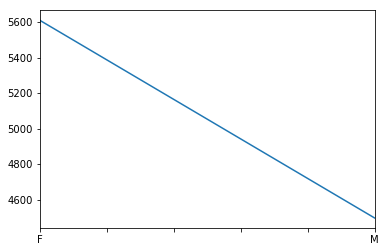

In [53]:
md[famille & actifs].genre.value_counts().plot()

Ce n'est pas très évocateur. On peut heureusement changer le type de graphique pour, par exemple, choisir un graphique en pointes de tarte. Il suffit d'ajouter, à la fonction ```.plot()``` l'argument ```kind``` auquel on donne la valeur de ```pie```.<br>
On peut aussi donner un titre à notre graphique avec l'argument ```title```.

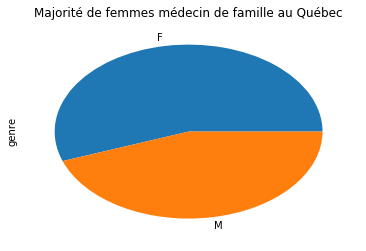

In [54]:
md[famille & actifs].genre.value_counts().plot(kind="pie", title="Majorité de femmes médecin de famille au Québec")

Un autre type de graphique intéressant est l'histogramme.<br>
Pour tracer l'évolution du nombre de médecins ayant intégré la profession médicale au cours des ans, on pourrait faire un histogramme de notre tableau ```md``` en fonction de la colonne ```annee``` avec la formule suivante&nbsp;:

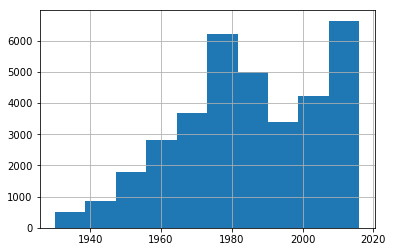

In [55]:
md.annee.hist()

Mais voilà qui ne raconte pas grand-chose. C'est que par défaut, l'histogramme trace 10 barres, ce qui fait que chaque barre de notre histogramme regroupe 7 ou 8 années.<br>
Les barres, c'est que ce matplotlib appelle des *«bins»*. On peut ainsi spécifier le nombre de ces *bins* avec un argument qui s'appelle... vous l'aurez deviné... ```bins```

Ici, comme nos données couvrent 87 années, on va créer 87 barres.<br>
Chacune représente le nombre de médecins qui ont obtenu leur permis de pratique au cours d'une année donnée.

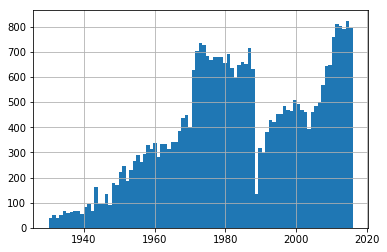

In [56]:
md.annee.hist(bins=87)

Il remarque une chute au début des années 1990. Elle correspond à une politique du gouvernement québécois qui avait limité le nombre d'inscriptions dans les facultés de médecine quelques années auparavant.

Inspiré par ce graphique, vous pourriez avoir envie de voir combien d'hommes et de femmes sont devenus médecin au fil des ans afin de visualiser la féminisation de la profession médicale. Pour ce faire, il suffirait de modifier la formule ci-dessus en ajoutant un ```groupby``` par ```genre```, puis l'argument ```alpha``` à la fonction ```.hist()``` pour faire en sorte que nos barres aient une transparence de 50%.

genre
F    Axes(0.125,0.125;0.775x0.755)
M    Axes(0.125,0.125;0.775x0.755)
Name: annee, dtype: object

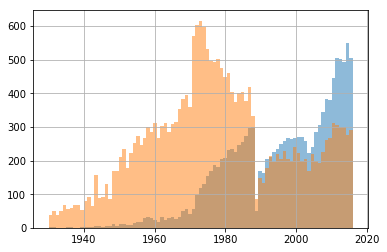

In [57]:
md.groupby("genre").annee.hist(bins=87,alpha=0.5)

Le graphique ci-dessus raconte une histoire avec les données.

On y voit que jusqu'en 1970, les hommes (en jaune) étaient clairement majoritaires dans la profession.<br>
À partir de 1970 semble s'opérer un renversement. Le nombre d'hommes diminue progressivement pour, dès 1990, devenir inférieur au nombre de femmes (en bleu).<br>
Aujourd'hui, les deux tiers des recrues, en médecine, chaque année, sont des femmes.

-----

En terminant, faisons aussi un graphique avec nos données de contrats.<br>
Calculons la somme des contrats octroyés chaque année, créons un diagramme à barres horizontales (```kind="barh"```) et donnons une couleur de camouflage (*teal*) à nos barres.

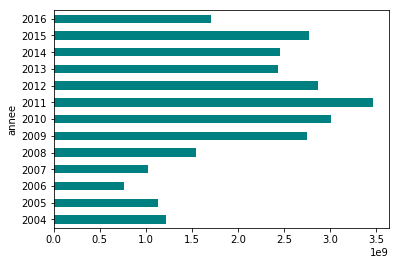

In [58]:
mil.groupby("annee").montant.sum().plot(kind="barh",color="teal")

#### Voilà! J'espère que, grâce à pandas, vous aurez un peu de plaisir à explorer vos données!